In [1]:
import numpy as np
from pr3_utils import *
from stereo import *

In [2]:
dataset = "03"
time_stamp,features,linear_velocity,angular_velocity,K,b,imu_T_cam = load_data(f"../data/{dataset}.npz")

num_time_stamp = time_stamp.shape[0]
num_features = features.shape[1]

tau = time_stamp[1:] - time_stamp[:-1]
velocity = np.concatenate([linear_velocity, angular_velocity], axis=1)

* state $T_t \in \mathbb{R}^{[4\times4]}$
* control $U_t \in \mathbb{R}^6$ is general velocity
* error $w \sim N(0, diag(W, W, W, W, W, W)$
$$
f: \exp(\text{hat}(x_{t+1})) = \exp(\text{hat}(x_{t})) \cdot \exp(\tau_t \text{hat}(U_t + w))
$$


In [3]:
T_mean = np.zeros([time_stamp.shape[0], 4, 4])
T_covar = np.zeros([time_stamp.shape[0], 6, 6])

# init T_0
T_mean[0,:,:] = np.array([
    [1, 0, 0,0],
    [0, 1, 0,0],
    [0, 0, 1,0],
    [0, 0, 0,1],
])
T_covar[0,:,:] = np.diag([0,0,0,0,0,0])

W = np.diag([1,1,1,1,1,1])
for t in range(1, time_stamp.shape[0]):
    T_mean[t,:,:] = T_mean[t-1,:,:] @ twist2pose(tau[t-1]*axangle2twist(velocity[t]))
    F = twist2pose(-tau[t-1]*axangle2adtwist(velocity[t]))
    T_covar[t,:,:] = F @ T_covar[t-1,:,:] @ F.T + W

/Users/weixiaozhan/GradSchool/24WT/ECE276A_SensingEstimationRobotics/PR3/code/pr3_utils.py:88: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x,y,'r-',label=path_name, c="C0")


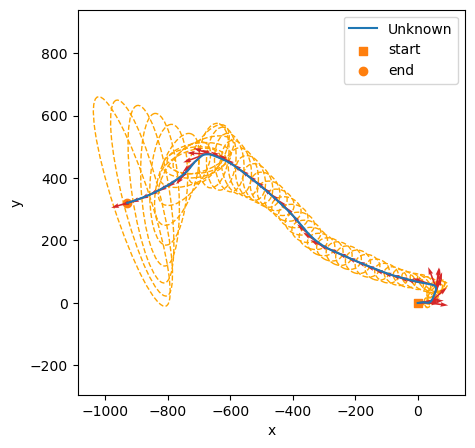

(<Figure size 500x500 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

In [4]:
visualize_trajectory(T_mean, T_covar)

In [5]:
np.save(f"../data/predict_T_mean_{dataset}",T_mean)
np.save(f"../data/predict_T_covar_{dataset}",T_covar)